In [1]:
# Importante Required Libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read The Dataset
data = pd.read_csv('loan_data.csv')
print(data.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [4]:
print('Column Names :\n', data.columns)

Column Names :
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [5]:
#Label Encode The Target Variable
encode = LabelEncoder()
data.Loan_Status = encode.fit_transform(data.Loan_Status)

In [6]:
print(data.head())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area  Loan_Status  
0             1.0         Urban            1  
1             1.0         Rural            0  
2             1.0

In [7]:
print('Shape of data before dropping the rows that have null values :''\n', data.shape)

Shape of data before dropping the rows that have null values :
 (614, 13)


In [8]:
# Dropping The Rows That Have Null Values
data.dropna(inplace=True)

In [9]:
print('Shape of data after dropping the rows that have null values :''\n', data.shape)

Shape of data after dropping the rows that have null values :
 (480, 13)


In [10]:
# Train-Test-Split   
train, test = train_test_split(data,test_size=0.3,random_state=0)

In [23]:
# Seperate The dependent variable and Independent variables
train_x = train.drop(columns=['Loan_ID','Loan_Status'])
train_y = train['Loan_Status']
test_x = test.drop(columns=['Loan_ID','Loan_Status'])
test_y = test['Loan_Status']

In [12]:
print('shape of training data : ',train_x.shape)
print('shape of testing data : ',test_x.shape)

shape of training data :  (336, 11)
shape of testing data :  (144, 11)


In [13]:
# Encode The Data
train_x = pd.get_dummies(train_x)
test_x  = pd.get_dummies(test_x)
print('shape of training data : ',train_x.shape)
print('shape of testing data : ',test_x.shape)

shape of training data :  (336, 20)
shape of testing data :  (144, 20)


In [14]:
print(train_x)

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
454             7085                0.0        84.0             360.0   
80              3846                0.0       111.0             360.0   
206             3244                0.0        80.0             360.0   
417             1600            20000.0       239.0             360.0   
101             4843             3806.0       151.0             360.0   
..               ...                ...         ...               ...   
414             2149             3237.0       178.0             360.0   
247             6608                0.0       137.0             180.0   
152             9166                0.0       244.0             360.0   
60              2500             3796.0       120.0             360.0   
220             2221                0.0        60.0             360.0   

     Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes  \
454             1.0              0            1

In [15]:
# Scale The Data
scaler = StandardScaler().fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [16]:
print(train_x)

[[ 0.40732648 -0.56153901 -0.73995315 ... -0.61864048  1.19782411
  -0.67419986]
 [-0.33421261 -0.56153901 -0.41848706 ... -0.61864048  1.19782411
  -0.67419986]
 [-0.47203495 -0.56153901 -0.78757776 ... -0.61864048 -0.83484711
   1.4832397 ]
 ...
 [ 0.88375218 -0.56153901  1.16503111 ... -0.61864048 -0.83484711
   1.4832397 ]
 [-0.64236687  0.7542311  -0.31133169 ... -0.61864048 -0.83484711
   1.4832397 ]
 [-0.70624134 -0.56153901 -1.02570079 ... -0.61864048 -0.83484711
   1.4832397 ]]


In [17]:
# Using Logistic Regression Model
LR = LogisticRegression()
LR.fit(train_x,train_y)
predict = LR.predict(test_x)
print('Accuracy Score on test data using Logistic Regression: ', accuracy_score(test_y,predict))

Accuracy Score on test data using Logistic Regression:  0.7847222222222222


Confusion Matrix for Logistic Regression :
 [[18 31]
 [ 0 95]] 



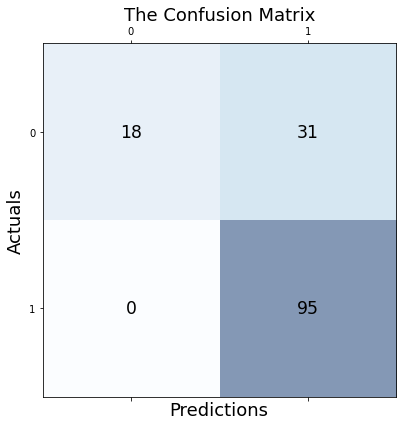

In [18]:
# Confusion Matrix for Logistic Regression  
cm = metrics.confusion_matrix(test_y, predict)
print('Confusion Matrix for Logistic Regression :\n', cm, '\n')
fig, ax = plt.subplots(figsize=(6.5, 6.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('The Confusion Matrix', fontsize=18)
plt.show()

In [19]:
# Using SVC Model
svc = SVC(kernel="linear")
svc.fit(train_x,train_y)
predict = svc.predict(test_x)
print('Accuracy Score on test data using SVC: ', accuracy_score(test_y,predict))

Accuracy Score on test data using SVC:  0.7916666666666666


In [20]:
# Using ID3 Model
DT = DecisionTreeClassifier(max_depth=(7), random_state=0)
DT.fit(train_x,train_y)
predict = DT.predict(test_x)
print('Accuracy Score on test data using ID3 : ', accuracy_score(test_y,predict))

Accuracy Score on test data using ID3 :  0.7638888888888888


In [21]:
# Using KNN Model
KNN = KNeighborsClassifier(n_neighbors=7)  
KNN.fit(train_x,train_y)
predict = KNN.predict(test_x)
print('Accuracy Score on test data using KNN: ', accuracy_score(test_y,predict))

Accuracy Score on test data using KNN:  0.7152777777777778


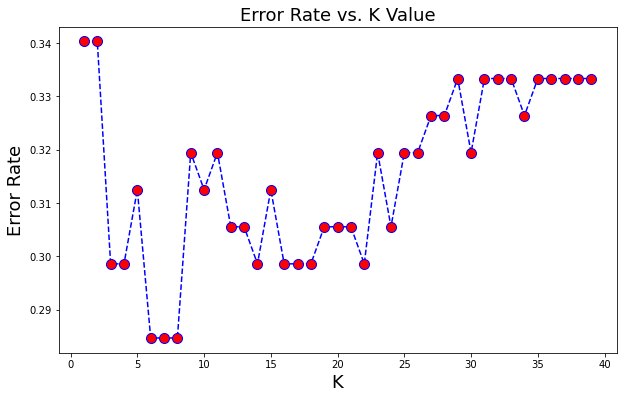

In [22]:
# To find a optimum value of K we plot a graph of error rate vs K value ranging from 0 to 40
error_rate = []
for i in range(1,40):
    kNN = KNeighborsClassifier(n_neighbors=i)
    kNN.fit(train_x,train_y)
    predict_i = kNN.predict(test_x)
    error_rate.append(np.mean(predict_i != test_y))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value', fontsize=18)
plt.xlabel('K', fontsize=18)
plt.ylabel('Error Rate', fontsize=18)
plt.show()